In [1]:
import pandas as pd
import collections
import numpy as np
import seaborn as sns
import datetime

In [2]:
df = pd.read_csv('./belize/belize_reviews.csv')
dfr = pd.read_csv('./belize/belize_listings.csv')

In [32]:
df2 = df[df.comments.str[:34] != "The host canceled this reservation"]
dates = pd.to_datetime(df2['date'])
del df2['date']
df2 = pd.concat((df2,dates), axis = 1, join='inner')
df2

,listing_id,id,reviewer_id,reviewer_name,comments,date
0,36666,145174,278365,Rb,Monique and Maurice has put Caye Caulker at th...,2010-11-27
1,36666,167715,258142,Angellini,"We had the best time, food and conversations w...",2011-08-01
2,36666,172375,268097,Michael,"Great, great place to stay on Caye Caulker. Ve...",2011-01-19
3,36666,179895,340713,Melinda,We stayed with Monique and Maurice for a coupl...,2011-08-02
4,36666,181056,117024,Gail,Monique's guest house was great for us. It was...,2011-12-02
...,...,...,...,...,...,...
39821,39183755,559272354,146550925,Nayerlin,"Increíble lugar, volvería sin duda alguna..",2019-03-11
39822,39183755,562960822,23535832,Clara,Great spot! Loved having AC and a pool! \nBage...,2019-11-11
39823,39218888,566787572,310056328,Alex,Wir hatten einen tollen Aufenthalt im Windschi...,2019-11-20
39824,39944342,565690422,25461269,Moira,Great place!,2019-11-17


In [3]:
#get date of first review and convert dates to date type 
dfr2 = dfr[['id', 'first_review']].copy()
date = pd.to_datetime(dfr2['first_review'])
del dfr2['first_review']
dfr2 = pd.concat((dfr2, date), axis = 1, join='inner')
dfr2

,id,first_review
0,36666,2010-11-27
1,36690,2010-08-13
2,108932,2017-12-25
3,110483,2013-06-04
4,120115,2017-04-18
...,...,...
2816,40394136,NaT
2817,40394675,NaT
2818,40396843,NaT
2819,40397261,NaT


In [4]:
#remove NaN (hosts with no reviews)
dfr2.dropna(subset = ['first_review'],inplace = True)
dfr2

,id,first_review
0,36666,2010-11-27
1,36690,2010-08-13
2,108932,2017-12-25
3,110483,2013-06-04
4,120115,2017-04-18
...,...,...
2633,39079574,2019-11-16
2638,39127463,2019-11-01
2647,39183755,2019-10-19
2650,39218888,2019-11-20


In [36]:
df2['year'] = df2['date'].dt.year

df2.sort_values(by='year')

,listing_id,id,reviewer_id,reviewer_name,comments,date,year
0,36666,145174,278365,Rb,Monique and Maurice has put Caye Caulker at th...,2010-11-27,2010
230,36690,78001,173050,Martha,We really enjoyed staying in Monique and Mauri...,2010-08-13,2010
231,36690,80916,171788,Emily,My boyfriend and I spent 3 nights in the caban...,2010-08-18,2010
232,36690,152414,273916,Celeste,Monique was a great hostess. My boyfriend and...,2010-12-12,2010
233,36690,155914,171609,Rondi,I had a great time staying with Monique and Ma...,2010-12-20,2010
...,...,...,...,...,...,...,...
25212,17681626,505687682,84578303,India,A great place to stay. Angie kept in touch the...,2019-09-08,2019
25213,17681626,508909907,231760936,Tamara,Angie was really kind and helped us a lot. The...,2019-08-13,2019
25214,17681626,511651476,238728429,Ricardo,Angie was amazing! She offered to pick us up a...,2019-08-17,2019
25184,17681626,426326978,13754472,Rachael,Angie's place was perfect for our first night ...,2019-03-20,2019


In [6]:
dfr2['year_first_review'] = dfr2['first_review'].dt.year

dfr2.sort_values(by='year_first_review')

,id,first_review,year_first_review
0,36666,2010-11-27,2010
1,36690,2010-08-13,2010
15,183285,2011-11-09,2011
13,182596,2011-12-28,2011
12,179190,2011-10-02,2011
...,...,...,...
1842,30016986,2019-11-11,2019
1838,30016976,2019-06-10,2019
1835,30015264,2019-03-24,2019
1918,30568927,2019-05-02,2019


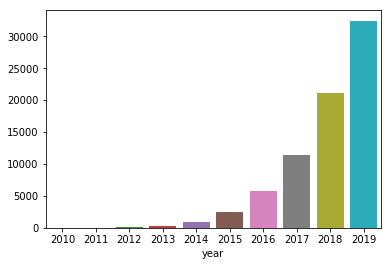

In [37]:
gb1 = df2.groupby('year')
gb1 = gb1.apply(lambda x: len(set(x['reviewer_id'])))
cum1 = gb1.cumsum()
x1 = cum1.index
y1 = cum1.values
sns.barplot(x1, y1)

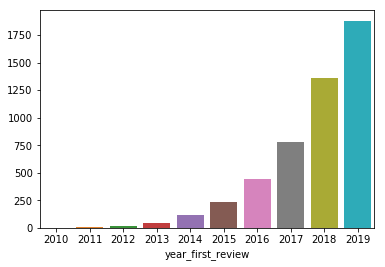

In [30]:
gb = dfr2.groupby('year_first_review')
gb = gb.apply(lambda x: len(set(x['id'])))
cum = gb.cumsum()
x = cum.index
y = cum.values
sns.barplot(x, y)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,36666,145174,27/11/2010,278365,Rb,Monique and Maurice has put Caye Caulker at th...
1,36666,167715,08/01/2011,258142,Angellini,"We had the best time, food and conversations w..."
2,36666,172375,19/01/2011,268097,Michael,"Great, great place to stay on Caye Caulker. Ve..."
3,36666,179895,08/02/2011,340713,Melinda,We stayed with Monique and Maurice for a coupl...
4,36666,181056,12/02/2011,117024,Gail,Monique's guest house was great for us. It was...
...,...,...,...,...,...,...
39821,39183755,559272354,03/11/2019,146550925,Nayerlin,"Increíble lugar, volvería sin duda alguna.."
39822,39183755,562960822,11/11/2019,23535832,Clara,Great spot! Loved having AC and a pool! \nBage...
39823,39218888,566787572,20/11/2019,310056328,Alex,Wir hatten einen tollen Aufenthalt im Windschi...
39824,39944342,565690422,17/11/2019,25461269,Moira,Great place!
